Deliverables:

- A Jupyter Notebook containing any code you've written for this project. This work will need to be pushed to a public GitHub repository dedicated for this project.

- An organized README.md file in the GitHub repository that describes the contents of the repository. This file should be the source of information for navigating through the repository.

- A Blog Post.

- An "Executive Summary" PowerPoint Presentation that gives a brief overview of your problem/dataset, and each step of the OSEMN process.

## Business Understanding

Tanzania, as a developing country, struggles with providing clean water to its population of over 57,000,000. Waterpoints are an invaluable source of water for household needs such as drinking and washing. These are strategically situated to help rural communities and given their importance, need to be constantly available for the communities. There are many waterpoints already established in the country, however, some are in need of repair while others have failed altogether. 

The primary task of this notebook is to predict the condition of a water well, given detailed information about the pumps. Ultimately, we will create a machine learning model to accurately determine contributing factors that can preemptively determine pump repair and/or failure. Knowing and addressing the most important factors are upkept will ensure pumps continue to provide clean water to people in Tanzania.

This information will prove useful to the entity responsible for the upkeep and maintenance of such waterpoints, as well as external donors that may be funding the operational costs associated with the equipment.

## Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# training_values.csv = features/dimensions we will be examining
# training_labels.csv = condition of the waterpoint 

features = pd.read_csv('training_values.csv')
labels = pd.read_csv('training_labels.csv')

In [2]:
# join the two dataframes on the id so we can match the correct condition to the correct waterpoint
df = features.set_index('id').join(labels.set_index('id'), how='inner')
df.reset_index(inplace=True)

In [3]:
display(df.head())
display(df.info())

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

None

> **Observations:** We will need to strategically reduce the current number of features, using domain knowledge and machine learning methods. Detailed information about what each feature means is defined in the `feature_descriptions.txt` data dictionary. We will examine the specific value counts for each column, shortly.

In [4]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


> **Observations:** `amount_tsh` (amount of water available to waterpoint) appears to have an outlier(s) as the _max_ values is significantly higher than the _mean_. We have no information on the interpretation of `num_private`, but has values from 0 to 1776, which is a signficant range. We also see 0 values for `construction_year`, which means we'll have to take that into consideration when dealing with missing/null values.

In [5]:
# obtain normalized value counts for each column
for col in df.columns:
    print(" ")
    print(f'---{col}---')
    print(df[col].value_counts())

 
---id---
2047     1
72310    1
49805    1
51852    1
62091    1
        ..
46396    1
36155    1
34106    1
38200    1
0        1
Name: id, Length: 59400, dtype: int64
 
---amount_tsh---
0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64
 
---date_recorded---
2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
             ... 
2011-09-15      1
2011-09-27      1
2011-09-26      1
2011-09-09      1
2012-01-21      1
Name: date_recorded, Length: 356, dtype: int64
 
---funder---
Government Of Tanzania      9084
Danida                      3114
Hesawa                      2202
Rwssp                       1374
World Bank                  1349
                            ... 
Villlage Contributi            1
Kcu                            1
Agt Church              

Name: quantity_group, dtype: int64
 
---source---
spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64
 
---source_type---
spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64
 
---source_class---
groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64
 
---waterpoint_type---
communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    11

> **Observations:** These results provide a great starting point in which features might be heavily correlated with one another or present similar data, like:
- `longitude`/`latitude` and `subvillage` and `region` and `region_code` and `district_code` and `lga/ward`
- `scheme_management` and `scheme_name`
- `extraction_type` and `extraction_type_group` and `extraction_type_class`
- `management` and `management_group`
- `water_quality` and `quality_group`
- `quantity` and `quantity_group`
- `source` and `source_type` and `source_class`
- `waterpoint_type` and `waterpoint_type_group`
- `payment` and `payment_type`

> These datapoints don't have any relevance or impact on the functionality of the wellpoint:
- `id`
- `wpt_name`
- `recorded_by` (same value for all datapoints)

> As we do not understand the feature description for `num_private` or `public_meeting` - it will be excluded from further analaysis.

> It also provides the three labels with which we will categorize the waterpoints:
- `functional`
- `non functional`
- `functional needs repair`

In [6]:
# slice relevant features for data analysis
feats = ['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'basin', 
         'region', 'population', 'scheme_management', 'permit', 'construction_year', 'extraction_type_class', 
         'management', 'payment_type', 'quality_group', 'quantity_group', 'source_type', 'waterpoint_type_group', 
         'status_group']
data = df[feats]

In [7]:
# ## changing the values in the education column
# spark_df_2 = spark_df.withColumn('EDUCATION',
#                     when(spark_df.EDUCATION == '0', 'Other')\
#                     .when(spark_df.EDUCATION == '5', 'Other')\
#                     .when(spark_df.EDUCATION == '6', 'Other')\
#                     .otherwise(spark_df['EDUCATION']))

# ## changing the values in the marriage column
# spark_df_done = spark_df_2.withColumn('MARRIAGE',
#                                    when(spark_df.MARRIAGE == '0', 'Other')\
#                                    .otherwise(spark_df['MARRIAGE']))

## Data Preparation

In [8]:
# examine dataset for NaN values
data.isna().sum()

# data.isna().any().any()

amount_tsh                  0
date_recorded               0
funder                   3635
gps_height                  0
installer                3655
longitude                   0
latitude                    0
basin                       0
region                      0
population                  0
scheme_management        3877
permit                   3056
construction_year           0
extraction_type_class       0
management                  0
payment_type                0
quality_group               0
quantity_group              0
source_type                 0
waterpoint_type_group       0
status_group                0
dtype: int64

In [9]:
# fill in relevant NaN values with placeholder value of 'unknown'
data.funder = df.funder.fillna("unknown")
data.installer = df.installer.fillna("unknown")
data.scheme_management = df.installer.fillna("unknown")
data.permit = data.permit.fillna("uknown")

In [10]:
# for unknown construction years, set the values as actual NaN values
data[data.construction_year == 0] = np.nan

In [11]:
data.construction_year.unique()

array([1999., 2010., 2009., 1986.,   nan, 2011., 1987., 1991., 1978.,
       1992., 2008., 1974., 2000., 2002., 2004., 1972., 2003., 1980.,
       2007., 1973., 1985., 1970., 1995., 2006., 1962., 2005., 1997.,
       2012., 1996., 1977., 1983., 1984., 1990., 1982., 1976., 1988.,
       1989., 1975., 1960., 1961., 1998., 1963., 1971., 1994., 1968.,
       1993., 2001., 1979., 1967., 2013., 1969., 1981., 1964., 1966.,
       1965.])

In [12]:
# data.construction_year.fillna(data.construction_year.median())

In [13]:
# check original dataframe for duplicate values by unique `id` and `construction_year`
df[df.duplicated(['id','construction_year'])]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group


In [14]:
# remove NaN values from the data for which the status of the waterpoint is unknown
data.status_group.value_counts()

functional                 21704
non functional             14459
functional needs repair     2528
Name: status_group, dtype: int64

In [15]:
# set the values as actual NaN values so it can be dropped from the dataframe
data[data.status_group == 'nan'] = np.nan
data.dropna(subset= ['status_group'], inplace=True)

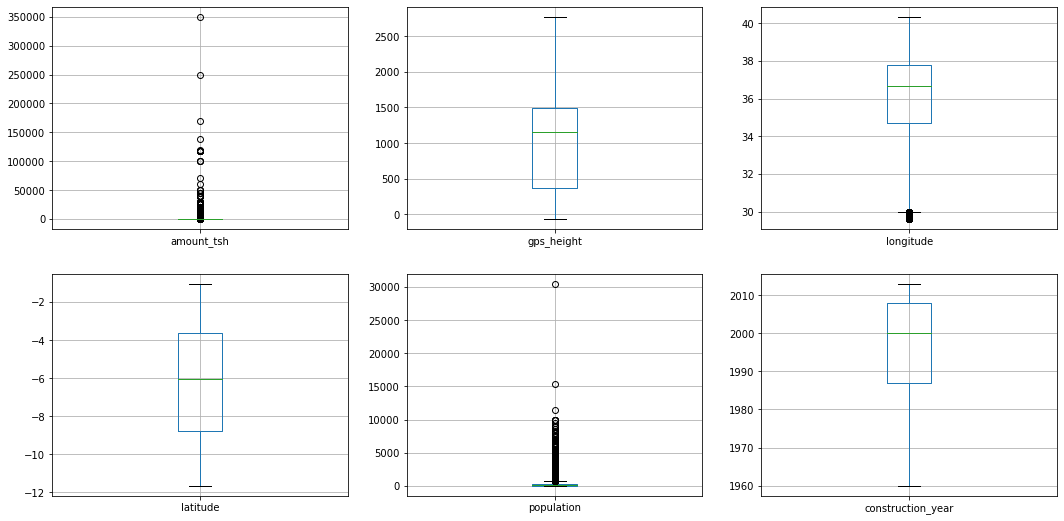

In [16]:
# create a boxplot to look for outliers (remove non-applicable columns)
cols = [col for col in data.columns if data[col].dtype != 'O']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,9))
for xcol, ax in zip(cols, axes.flatten()):
    boxplot = data.boxplot(column=xcol, ax=ax)

In [17]:
# examine outliers in further detail
display(data[data.amount_tsh >= 190000])
display(data[data.population >= 20000]) 

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region,population,...,permit,construction_year,extraction_type_class,management,payment_type,quality_group,quantity_group,source_type,waterpoint_type_group,status_group
10812,350000.0,2013-03-01,unknown,1558.0,unknown,34.840029,-4.542934,Internal,Singida,886.0,...,uknown,1990.0,motorpump,vwc,annually,good,insufficient,borehole,communal standpipe,functional
22191,250000.0,2011-03-04,Ded,285.0,WU,38.410852,-6.117538,Wami / Ruvu,Pwani,80.0,...,True,2003.0,submersible,parastatal,monthly,good,enough,river/lake,communal standpipe,functional


,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region,population,...,permit,construction_year,extraction_type_class,management,payment_type,quality_group,quantity_group,source_type,waterpoint_type_group,status_group
30537,0.0,2011-03-12,Government Of Tanzania,184.0,DWE,38.783756,-5.181904,Pangani,Tanga,30500.0,...,False,2008.0,handpump,vwc,never pay,salty,insufficient,shallow well,hand pump,functional


> **Observation**: None of the datapoints look like it was incorrectly entered and make reasonable sense. We'll include these outliers for now and determine at a later time, if removing them aids in model accuracy. Additionally, these waterpoints could be geographically positioned in a place with a large basin. Also populations tend to congregate, so it is not unreasonable to have outliers in available water at certain waterpoints or large populations.

In [18]:
# convert every data value to a string, if the feature column is an object datatype
for col in data.columns:
    if data[col].dtype == 'O':
        data.loc[:, col] = data[col].apply(str)

In [19]:
labels = data.status_group
features = data.drop('status_group', axis=1)

## Modeling

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=73)
print(len(X_train), len(X_test), len(y_train), len(y_test))

29018 9673 29018 9673


In [21]:
### question: is this an example of class imbalance? (class_weight)

# find potential class imbalance in training and test sets
print(y_train.value_counts(normalize=True))

functional                 0.559205
non functional             0.375284
functional needs repair    0.065511
Name: status_group, dtype: float64


In [22]:
print(y_test.value_counts(normalize=True))

functional                 0.566215
non functional             0.368965
functional needs repair    0.064820
Name: status_group, dtype: float64


In [23]:
# OneHotEncode categorical variables
from sklearn.preprocessing import OneHotEncoder

# create dataframe of only categorical features
cat_features = [col for col in features.columns if features[col].dtype in [np.object]]
X_train_cat = X_train.loc[:, cat_features]
X_test_cat = X_test.loc[:, cat_features]

ohe = OneHotEncoder(handle_unknown = 'ignore') # we're dropping the first category created for each feature to prevent multicollinearity

X_train_ohe = ohe.fit_transform(X_train_cat)
X_test_ohe = ohe.transform(X_test_cat)

columns = ohe.get_feature_names(input_features=X_train_cat.columns)
ohe_X_train = pd.DataFrame(X_train_ohe.todense(), columns=columns, index=X_train.index)
ohe_X_test = pd.DataFrame(X_test_ohe.todense(), columns=columns, index=X_test.index)

In [ ]:
### Create baseline model ### 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# construct a pipeline
pipe_lr = Pipeline([('clf', LogisticRegression(random_state=73))])

# fit the pipeline
pipe_lr.fit(ohe_X_train, y_train)

# print the accuracy on test set
print(f'pipeline test accuracy:{pipe_lr.score(ohe_X_test, y_test) :.2%}')

In [ ]:
import seaborn as sns
from sklearn.decomposition import PCA

sns.set_style('darkgrid')

pca = PCA()
pca.fit_transform(ohe_X_train)

# determine the number of features to capture 95% of the variance
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_95 = len(total_explained_variance[total_explained_variance >= .95])
n_to_reach_95 = ohe_X_train.shape[1] - n_over_95 + 1
print("Number features: {}\tTotal Variance Explained: {}".format(n_to_reach_95, total_explained_variance[n_to_reach_95-1]))

# subset the dataset to these principal components which capture 95% of the overall variance
# reproject the dataset into a lower-dimensional space using PCA
pca = PCA(n_components=n_to_reach_95)
X_pca_train = pca.fit_transform(ohe_X_train)
X_pca_test = pca.transform(ohe_X_test)

pca.explained_variance_ratio_.cumsum()[-1]
# #### refit a model on the compressed dataset ####
# clf = svm.SVC(gamma='auto')
# train_pca_acc = clf.score(X_pca_train, y_train)
# test_pca_acc = clf.score(X_pca_test, y_test)
# print('Training Accuracy: {}\tTesting Accuracy: {}'.format(train_pca_acc, test_pca_acc))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# construct a pipeline
pipe_lr = Pipeline([('ss', StandardScaler()),
                    # ('pca', PCA(n_components=403, random_state=73)),
                    ('clf', LogisticRegression(random_state=73))])

C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']

# Define the grid
grid = [{'clf__C': C, 
         'clf__penalty': penalty}]

# Define a grid search
gridsearch = GridSearchCV(estimator=pipe_lr, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

# Fit the pipelines
gridsearch.fit(ohe_X_train, y_train)

best_parameters = gridsearch.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

# Print the accuracy on test set
print(f'pipeline test accuracy:{gridsearch.score(ohe_X_test, y_test) :.2%}')

# Grid Search found the following optimal parameters: 
# clf__C: 0.0013894954943731374
# clf__penalty: 'l2'
# pipeline test accuracy:76.54%

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits

# construct a pipeline
pipe_knn = Pipeline([('ss', StandardScaler()),
                    ('knn', KNeighborsClassifier())])

# Define the grid
grid = [{'knn__n_neighbors': [11],  #19
         'knn__weights': ['uniform', 'distance'],
         'knn__metric': ['euclidean', 'manhattan']}]

# Define a grid search
gridsearch = GridSearchCV(estimator=pipe_knn, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=3,
                          n_jobs=-1)

# Fit the pipelines
%timeit gridsearch.fit(ohe_X_train, y_train)

best_parameters = gridsearch.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

# Print the accuracy on test set
print(f'pipeline test accuracy:{gridsearch.score(ohe_X_test, y_test) :.2%}')

# Grid Search found the following optimal parameters: 
# knn__metric: 'manhattan'
# knn__n_neighbors: 19
# knn__weights: 'distance'
# pipeline test accuracy:76.76%

# 45min 21s ± 2min 56s per loop (mean ± std. dev. of 7 runs, 1 loop each)
# Grid Search found the following optimal parameters: 
# knn__metric: 'manhattan'
# knn__n_neighbors: 11
# knn__weights: 'distance'
# pipeline test accuracy:76.33%

In [ ]:
from sklearn.svm import SVC

# construct a pipeline
pipe_svm = Pipeline([#('pca', PCA(n_components=284, random_state=73)),
                    ('ss', StandardScaler()),
                    ('svm', SVC(random_state=73))])

# Define the grid
# grid = [
#   {'svm__C': [0.1, 1, 10] , 'svm__kernel': ['linear']},
#   {'svm__C': [1, 10], 'svm__gamma': [0.001, 0.01], 'svm__kernel': ['rbf']}
#  ]

# grid = [{'svm__C' : np.linspace(.1, 10, num=2),
#         'svm__gamma' : np.linspace(10**-3, 5, num=2)}]

# grid = [{'svm__C' : np.linspace(.1, 10, num=2),
#         'svm__gamma' : np.linspace(10**-3, 5, num=2),
#         'svm__kernel': ['linear']}] #,'rbf', 'poly', 'sigmoid'

grid = [{'svm__C' : [.1],
        'svm__gamma' : [0.01]}]

# Define a grid search
gridsearch = GridSearchCV(estimator=pipe_svm, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=3,
                          n_jobs=-1,
                          verbose=1)

# Fit the pipelines
gridsearch.fit(ohe_X_train, y_train)

best_parameters = gridsearch.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

# Print the accuracy on test set
print(f'pipeline test accuracy:{gridsearch.score(ohe_X_test, y_test) :.2%}')

# [Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
# [Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 134.6min finished
# Grid Search found the following optimal parameters: 
# svm__C: 10
# svm__gamma: 0.01
# pipeline test accuracy:76.10%

# Fitting 3 folds for each of 1 candidates, totalling 3 fits
# [Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
# [Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 47.1min finished
# Grid Search found the following optimal parameters: 
# svm__C: 0.1
# svm__gamma: 0.01
# pipeline test accuracy:64.96%

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# construct a pipeline
pipe_dtc = Pipeline([('ss', StandardScaler()),
                    ('dtc', DecisionTreeClassifier(random_state=73))])

# Define the grid
grid = [{'dtc__criterion': ['gini', 'entropy'],
         'dtc__max_depth': [None, 2, 3, 4, 5, 6],
         'dtc__min_samples_split': [2, 5, 10],
         'dtc__min_samples_leaf': [1, 2, 3, 4, 5, 6]}]

# Define a grid search
gridsearch = GridSearchCV(estimator=pipe_dtc, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=3,
                          n_jobs=-1)

# Fit the pipelines
gridsearch.fit(ohe_X_train, y_train)

best_parameters = gridsearch.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

# Print the accuracy on test set
print(f'pipeline test accuracy:{gridsearch.score(ohe_X_test, y_test) :.2%}')

# Grid Search found the following optimal parameters: 
# dtc__criterion: 'entropy'
# dtc__max_depth: None
# dtc__min_samples_leaf: 1
# dtc__min_samples_split: 5
# pipeline test accuracy:78.09%

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# construct a pipeline
pipe_rfc = Pipeline([('ss', StandardScaler()),
                    ('rfc', RandomForestClassifier(random_state=73))])

# Define the grid
grid = [{'rfc__n_estimators': [10, 30, 100, 200],
         'rfc__criterion': ['gini', 'entropy'],
         'rfc__max_depth': [None, 2, 6, 10],
         'rfc__min_samples_split': [2, 5, 10],
         'rfc__min_samples_leaf': [1, 3, 6]}]

# Define a grid search
gridsearch = GridSearchCV(estimator=pipe_rfc, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=3,
                          n_jobs=-1)

# Fit the pipelines
gridsearch.fit(ohe_X_train, y_train)

best_parameters = gridsearch.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

# Print the accuracy on test set
print(f'pipeline test accuracy:{gridsearch.score(ohe_X_test, y_test) :.2%}')

# Grid Search found the following optimal parameters: 
# rfc__criterion: 'entropy'
# rfc__max_depth: None
# rfc__min_samples_leaf: 1
# rfc__min_samples_split: 10
# rfc__n_estimators: 200
# pipeline test accuracy:80.48%

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# construct a pipeline
pipe_abc = Pipeline([# ('pca', PCA(n_components=284, random_state=73)),
                    ('ss', StandardScaler()),
                    ('abc', AdaBoostClassifier(random_state=73))])

# Define the grid
grid = [{'abc__n_estimators': [30, 50, 70],
         'abc__learning_rate': [1.0, 0.5, 0.1]}]

# Define a grid search
gridsearch = GridSearchCV(estimator=pipe_abc, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=3,
                          n_jobs=-1)

# Fit the pipelines
gridsearch.fit(ohe_X_train, y_train)

best_parameters = gridsearch.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

# Print the accuracy on test set
print(f'pipeline test accuracy:{gridsearch.score(ohe_X_test, y_test) :.2%}')

# Grid Search found the following optimal parameters: 
# abc__learning_rate: 1.0
# abc__n_estimators: 70
# pipeline test accuracy:74.53%

In [ ]:
import xgboost as xgb

# construct a pipeline
pipe_xgb = Pipeline([#('pca', PCA(n_components=284, random_state=73)),
                    ('ss', StandardScaler()),
                    ('xgb', xgb.XGBClassifier(random_state=73))])

# Define the grid
grid = [{'xgb__learning_rate': [0.05, 0.1],
         'xgb__max_depth': [3, 6],
         'xgb__min_child_weight': [5, 10],
         'xgb__subsample': [0.3, 0.7],
         'xgb__n_estimators': [5, 30, 100, 250]}]

# Define a grid search
gridsearch = GridSearchCV(estimator=pipe_xgb, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=3,
                          n_jobs=-1)

# Fit the pipelines
gridsearch.fit(ohe_X_train, y_train)

best_parameters = gridsearch.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

# Print the accuracy on test set
print(f'pipeline test accuracy:{gridsearch.score(ohe_X_test, y_test) :.2%}')

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# construct a pipeline
pipe_gbf = Pipeline([# ('pca', PCA(n_components=284, random_state=73)),
                    ('ss', StandardScaler()),
                    ('gbf', GradientBoostingClassifier(random_state=73))])

# Define the grid
grid = [{'gbf__loss':["deviance"],
         'gbf__learning_rate': [0.01, 0.2],
         'gbf__min_samples_split': [0.1, 0.5],
         'gbf__min_samples_leaf': [0.1, 0.5],
         'gbf__max_depth':[3, 8],
         'gbf__max_features':["log2","sqrt"],
         'gbf__criterion': ["friedman_mse",  "mae"],
         'gbf__subsample':[0.5, 1.0],
         'gbf__n_estimators':[10]}]


# # Define the grid
# grid = [{'gbf__loss':["deviance"],
#          'gbf__learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
#          'gbf__min_samples_split': np.linspace(0.1, 0.5, 12),
#          'gbf__min_samples_leaf': np.linspace(0.1, 0.5, 12),
#          'gbf__max_depth':[3,5,8],
#          'gbf__max_features':["log2","sqrt"],
#          'gbf__criterion': ["friedman_mse",  "mae"],
#          'gbf__subsample':[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
#          'gbf__n_estimators':[10]}]


# Define a grid search
gridsearch = GridSearchCV(estimator=pipe_gbf, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=3,
                          n_jobs=-1)

# Fit the pipelines
gridsearch.fit(ohe_X_train, y_train)

best_parameters = gridsearch.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

# Print the accuracy on test set
print(f'pipeline test accuracy:{gridsearch.score(ohe_X_test, y_test) :.2%}')

# Grid Search found the following optimal parameters: 
# gbf__criterion: 'friedman_mse'
# gbf__learning_rate: 0.2
# gbf__loss: 'deviance'
# gbf__max_depth: 3
# gbf__max_features: 'sqrt'
# gbf__min_samples_leaf: 0.1
# gbf__min_samples_split: 0.5
# gbf__n_estimators: 10
# gbf__subsample: 1.0
# pipeline test accuracy:58.34%

Grid Search found the following optimal parameters: 
gbf__criterion: 'friedman_mse'
gbf__learning_rate: 0.2
gbf__loss: 'deviance'
gbf__max_depth: 3
gbf__max_features: 'sqrt'
gbf__min_samples_leaf: 0.1
gbf__min_samples_split: 0.5
gbf__n_estimators: 10
gbf__subsample: 1.0
pipeline test accuracy:58.34%


In [ ]:
# naive bayes classifer
import pandas as pd

df = pd.read_csv('heart.csv')

# briefly explore your dataset
pd.plotting.scatter_matrix(df, figsize=(10,10)); 
df['target'].value_counts() 

# define the problem
X = df[[col for col in df.columns if col != 'target']]
y = df['target']

# Perform a train-test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)

# Calculate the mean and standard deviation for each feature within each class for the training set
train = pd.concat([X_train, y_train], axis=1)
aggs = train.groupby('target').agg(['mean', 'std'])

# define function to calculate point estimate for the conditional probability
# of a feature value for a given class
from scipy import stats
def p_x_given_class(obs_row, feature, class_):
    mu = aggs[feature]['mean'][class_]
    std = aggs[feature]['std'][class_]
    
    # Observation
    obs = obs_row[feature] 
    
    p_x_given_y = stats.norm.pdf(obs, loc=mu, scale=std)
    return p_x_given_y

# define prediction function
def predict_class(obs_row):
    c_probs = []
    for c in range(2):
        # Initialize probability to relative probability of class
        p = len(y_train[y_train == c])/len(y_train) 
        for feature in X.columns:
            p *= p_x_given_class(obs_row, feature, c)
        c_probs.append(p)
    return np.argmax(c_probs)

# apply prediction function to the training and test sets
y_hat_train = [predict_class(X_train.iloc[idx]) for idx in range(len(X_train))]
y_hat_test = [predict_class(X_test.iloc[idx]) for idx in range(len(X_test))]

# calculate training and test accuracy
residuals_train = y_hat_train == y_train
acc_train = residuals_train.sum()/len(residuals_train)

residuals_test = y_hat_test == y_test
acc_test = residuals_test.sum()/len(residuals_test)
print('Training Accuracy: {}\tTesting Accuracy: {}'.format(acc_train, acc_test))

In [ ]:
## examples of evaluation metrics

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

preds = pipe_lr.predict(ohe_X_test)

# f1_score(y_test, preds)
accuracy_score(y_test, preds)

# confusion matrix
confusion_matrix(y_test, preds)

# plot the confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_test, y_test,
                     cmap=plt.cm.Blues)
plt.show()

# classification report
print(classification_report(y_test, preds))

# cross validation
print('Mean Logistic Regression Cross-Val Score (k=5):')
print(cross_val_score(dt_clf, X_train, y_train, cv=3).mean())

tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree_clf.fit(data_train, target_train)

# feature importance
tree_clf.feature_importances_

# check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# plot the ROC curve
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# when using pipeline, don't have to use .predict?

# clf = xgb.XGBClassifier()
# clf.fit(X_train, y_train)
# training_preds = clf.predict(X_train)
# val_preds = clf.predict(X_test)
# training_accuracy = accuracy_score(y_train, training_preds)
# val_accuracy = accuracy_score(y_test, val_preds)

## Evaluation

Recall that there are many different metrics we might use for evaluating a classification model. Accuracy is intuitive, but can be misleading, especially if you have class imbalances in your target. Perhaps, depending on you're defining things, it is more important to minimize false positives, or false negatives. It might therefore be more appropriate to focus on precision or recall. You might also calculate the AUC-ROC to measure your model's discrimination.

## Deployment

In this case, your "deployment" comes in the form of the deliverables listed above. Make sure you can answer the following questions about your process:

"How did you pick the question(s) that you did?"
"Why are these questions important from a business perspective?"
"How did you decide on the data cleaning options you performed?"
"Why did you choose a given method or library?"
"Why did you select those visualizations and what did you learn from each of them?"
"Why did you pick those features as predictors?"
"How would you interpret the results?"
"How confident are you in the predictive quality of the results?"
"What are some of the things that could cause the results to be wrong?"